In [1]:
# %tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
import os

In [2]:
import pathlib
from pathlib import Path
data_dir = Path('train_foods/.')
test_data_dir = Path('test_foods/.')

# chicken_wings, french_fries, grilled_cheese_sandwich, hamburger, hot_dog, ice_cream, macaroni_and_cheese, ramen, steak, waffles

In [3]:
# image_count = len(list(data_dir.glob('*/*.jpg')))
# image_count

In [4]:
# image_count = len(list(test_data_dir.glob('*/*.jpg')))
# image_count

In [5]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['chicken_wings', 'french_fries', 'grilled_cheese_sandwich',
       'hamburger', 'hot_dog', 'ice_cream', 'macaroni_and_cheese',
       'ramen', 'steak', 'waffles'], dtype='<U23')

In [6]:
# hamburgers = list(data_dir.glob('hamburger/*'))

# for image_path in hamburgers[:3]:
#     display.display(Image.open(str(image_path)))

In [7]:
# Loading using tf
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
test_list_ds = tf.data.Dataset.list_files(str(test_data_dir/'*/*'))

In [8]:
# for f in list_ds.take(5):
#   print(f.numpy())

In [9]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [10]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
#   img = tf.image.rgb_to_grayscale(img)
  # resize the image to the desired size.
  return tf.image.resize(img, [224, 224])

In [11]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [12]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_labeled_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [13]:
# type(labeled_ds.take(1))

In [14]:
# for image, label in labeled_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())

In [15]:
print('begin prep')

begin prep


In [16]:
def prepare_for_training(ds, cache=True, batch_size=100, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(batch_size) # BATCH_SIZE

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [17]:
train_ds = prepare_for_training(labeled_ds, batch_size=9900)
test_ds = prepare_for_training(test_labeled_ds)

image_batch, label_batch = next(iter(train_ds))
test_image_batch, test_label_batch = next(iter(test_ds))
print('finished')

finished


In [18]:
# type(image_batch.numpy())
# type(image_batch)
# # type(label_batch.numpy())

In [19]:
# image_batch[0]

In [20]:
# image_batch.numpy()[0]

In [21]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [22]:
# image_batch.numpy().shape

In [23]:
# # For gray-scale

# image_batch = np.reshape(image_batch.numpy(), (9900, 224, 224))
# test_image_batch = np.reshape(test_image_batch.numpy(), (100, 224, 224))

In [24]:
# image_batch, test_image_batch = image_batch / 255.0, test_image_batch / 255.0

In [25]:
# image_batch.shape

In [26]:
# test_image_batch.shape

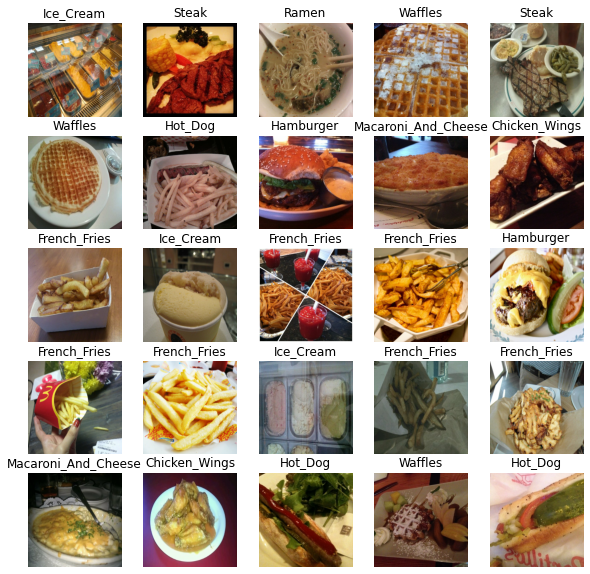

In [27]:
show_batch(image_batch, label_batch.numpy())

In [28]:
# import time
# default_timeit_steps = 1000

# def timeit(ds, steps=default_timeit_steps):
#   start = time.time()
#   it = iter(ds)
#   for i in range(steps):
#     batch = next(it)
#     if i%10 == 0:
#       print('.',end='')
#   print()
#   end = time.time()

#   duration = end-start
#   print("{} batches: {} s".format(steps, duration))
#   print("{:0.5f} Images/s".format(9900*steps/duration)) # BATCH_SIZE

In [29]:
# `tf.data`
# timeit(train_ds)

In [30]:
# type(train_ds)

In [31]:
CLASS_NAMES

array(['chicken_wings', 'french_fries', 'grilled_cheese_sandwich',
       'hamburger', 'hot_dog', 'ice_cream', 'macaroni_and_cheese',
       'ramen', 'steak', 'waffles'], dtype='<U23')

In [32]:
# image_batch.numpy().shape

In [33]:
# convert to grayscale
# np.dot(image_batch.numpy(), [0.2989, 0.5870, 0.1140])

In [34]:
# label_batch.numpy().shape

In [35]:
# type(np.transpose(np.nonzero(label_batch[0].numpy()))[0][0])

In [36]:
train_labels = []
test_labels = []
print(len(label_batch.numpy()))
for i in range(len(label_batch.numpy())):
    train_labels.append(np.transpose(np.nonzero(label_batch[i].numpy()))[0][0])
for i in range(len(test_label_batch.numpy())):
    test_labels.append(np.transpose(np.nonzero(label_batch[i].numpy()))[0][0])
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

9900


In [37]:
# print(test_label_batch.numpy())
# print(train_labels)
# print(type(train_labels))
# print(type(image_batch))

In [38]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(224, 224, 3)),  # input layer (1)
#     keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
#     keras.layers.Dense(10, activation='softmax') # output layer (3)
# ])

In [39]:
# !pip install -q keras

In [40]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# # Create the model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# print('finished')

In [41]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [42]:
# model.fit(image_batch, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

In [43]:
# np.transpose(np.nonzero(label_batch[5].numpy()))[0][0]

In [44]:
# test_loss, test_acc = model.evaluate(test_image_batch,  test_labels, verbose=1) 

# print('Test accuracy:', test_acc)

In [45]:
from tensorflow.keras import datasets, layers, models
# # No pretrained model
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [46]:
# # No pretrained model
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [47]:
# # No pretrained model
# model.summary()

In [48]:
IMG_SHAPE = (224, 224, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()

9412608/9406464 [==============================] - 3s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
________________

In [49]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [50]:
prediction_layer = keras.layers.Dense(10)

In [51]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [52]:
# # No pretrained model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [53]:
# Pretrained model
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
history = model.fit(image_batch, train_labels, epochs=4, 
                    validation_data=(test_image_batch, test_labels))

Epoch 1/4
310/310 [==============================] - 441s 1s/step - loss: 0.7650 - accuracy: 0.7584 - val_loss: 5.5903 - val_accuracy: 0.0900
Epoch 2/4
310/310 [==============================] - 435s 1s/step - loss: 0.4868 - accuracy: 0.8444 - val_loss: 6.4340 - val_accuracy: 0.1100
Epoch 3/4
310/310 [==============================] - 432s 1s/step - loss: 0.4191 - accuracy: 0.8697 - val_loss: 6.9246 - val_accuracy: 0.0900
Epoch 4/4
310/310 [==============================] - 431s 1s/step - loss: 0.3753 - accuracy: 0.8838 - val_loss: 7.1011 - val_accuracy: 0.0900


In [55]:
test_loss, test_acc = model.evaluate(test_image_batch,  test_labels, verbose=2)
print(test_acc)

4/4 - 3s - loss: 7.1011 - accuracy: 0.0900
0.09000000357627869


Pick a number: 40


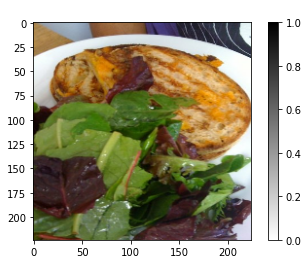

In [64]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['chicken_wings', 'french_fries', 'grilled_cheese_sandwich',
       'hamburger', 'hot_dog', 'ice_cream', 'macaroni_and_cheese',
       'ramen', 'steak', 'waffles']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 9800:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_image_batch[num]
label = test_labels[num]
predict(model, image, label)


In [65]:
# Save the entire model as a SavedModel.
model.save('saved_model/my_model2')

INFO:tensorflow:Assets written to: saved_model/my_model2/assets


In [58]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


In [59]:
##
# Try a different approach
##

In [60]:
# prior = keras.applications.VGG16(
#     include_top=False, 
#     weights='imagenet',
#     input_shape=(224, 224, 3)
# )
# model = keras.Sequential()
# model.add(prior)
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(256, activation='relu', name='Dense_Intermediate'))
# model.add(keras.layers.Dropout(0.1, name='Dropout_Regularization'))
# model.add(keras.layers.Dense(12, activation='sigmoid', name='Output'))

In [61]:
# # Freeze the VGG16 model, e.g. do not train any of its weights.
# # We will just use it as-is.
# for cnn_block_layer in model.layers[0].layers:
#     cnn_block_layer.trainable = False
# model.layers[0].trainable = False

In [62]:
# # Compile the model. I found that RMSprop with the default learning
# # weight worked fine.
# model.compile(
#     optimizer=keras.optimizers.RMSprop(),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [63]:
# model.fit(image_batch.numpy(), label_batch.numpy(), epochs=30)  # we pass the data, labels and epochs and watch the magic!

### 